In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


In [3]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [17]:
# Checking the outbreaks_df data frame for missing data
print(outbreaks_df.count());

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64


In [16]:
# Checking for correct data types
print(outbreaks_df.dtypes);

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object


In [68]:
# Collecting column names of series that have dtype object
Columns = [outbreaks_df[col].name for col in outbreaks_df.columns if outbreaks_df[col].dtypes == 'object'];

# retyping the objects in Columns to string (Figure out how to retype using my Columns list)

In [5]:
#Grouping the data by state
states_group = outbreaks_df.groupby('State')

In [6]:
# Number of Hospitalizations per state
hosp_state = states_group['Hospitalizations'].sum();

# Number of deaths per state
death_count = states_group['Fatalities'].sum();

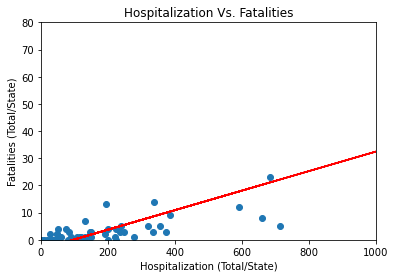

In [8]:
# Investigating correlation between Fatalities and Hospitalizations (Consider Doing Total Hopitalization Vs. Total Fatalities)
plt.scatter(hosp_state , death_count)
plt.title('Hospitalization Vs. Fatalities');
plt.xlabel('Hospitalization (Total/State)')
plt.ylabel('Fatalities (Total/State)')
plt.xlim((0,1000))
plt.ylim((0 , 80))
(m , b , rval , pval , stderr) = st.linregress(hosp_state , death_count);
regress_val = m * hosp_state + b;
plt.plot(hosp_state , regress_val , color = 'red');



### Broad Correlation
    It makes sense that as the number of hospitalizations increase we see an increase in fatalities. However , 
    we should be weary of focusing on a single feature for predictions since hospitalization does not account for severity of 
    admission or the contaminant that caused admission.

[None, None, None, None, None, None, None, None, None, None]

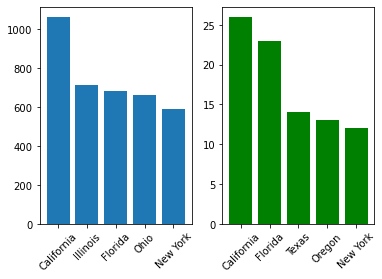

In [76]:
# Narrowing it down to the 5 states with the most 

#6 state values with the most hospitalizations
top_hosp = hosp_state.sort_values(ascending=False).head(6);

#6 state values with the most deaths
top_deaths = death_count.sort_values(ascending=False).head(6);

#Filtering out multistate label for both hospitalization and deaths
top_hosp = top_hosp.drop(labels = 'Multistate')

top_deaths = top_deaths.drop(labels = 'Multistate')


# #Plotting bar charts of 5 states with most Hospitalizatons | Fatalities
fig, (bar1 , bar2) = plt.subplots(1,2)

#Formatting for the first bar chart


bar1.bar(x = top_hosp.index , height = top_hosp)
plt.setp(bar1.get_xticklabels(), rotation=45 )

bar2.bar(x = top_deaths.index , height = top_deaths , color = 'green')
plt.setp(bar2.get_xticklabels(), rotation=45)


### Incidences of Outbreaks leading to Hospitalizations and Deaths for the top 5 states

    Hospitalization: Listed are our 

<AxesSubplot:ylabel='Fatalities'>

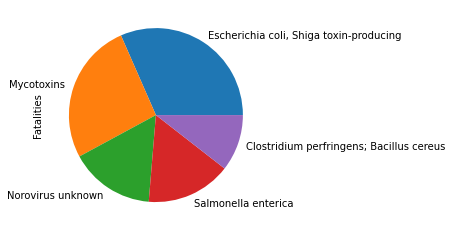

In [9]:
#Drilling down to a view of california outbreaks
cali_df = outbreaks_df[outbreaks_df['State'] == 'California'];

#Computing the 5 most common contaminants and plotting as a pie
cali_df.groupby('Species')['Fatalities'].sum().sort_values(ascending=False).head(5).plot.pie()